In [77]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [63]:
train_dir=r'C:\Users\Administrator\OneDrive\Desktop\NIELIT INTERNSHIP\train'
test_dir=r'C:\Users\Administrator\OneDrive\Desktop\NIELIT INTERNSHIP\test'

In [78]:
#rescale divides each pixel value by 255
train_para=ImageDataGenerator(rescale=1./255,rotation_range=40,
                   width_shift_range=0.2,
                   height_shift_range=0.2,
                   shear_range=0.2,
                   zoom_range=0.2,
                   horizontal_flip=True,
                   fill_mode='nearest',
                   validation_split=0.20)

In [79]:
train_para=ImageDataGenerator(rescale=1./255,               rotation_range=40,
                   width_shift_range=0.2,
                   height_shift_range=0.2,
                   shear_range=0.2,
                   zoom_range=0.2,
                   horizontal_flip=True,
                   fill_mode='nearest',
                   validation_split=0.20)

In [66]:
val_generator=train_para.flow_from_directory(
    train_dir,
    target_size=(300,300),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
    )

Found 548 images belonging to 5 classes.


In [67]:
model = Sequential([
    Conv2D(32, (3,3), activation ='relu',input_shape=(300,300,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [74]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss',patience=5,verbose=2,restore_best_weights=True)

In [76]:
hist=model.fit(
    train_generator,
    validation_data=val_generator,
    epoch=100,
    callbacks=[early_stopping]
    )

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_14360\2531600782.py", line 1, in <module>
    hist=model.fit(
         ^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 119, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: TensorFlowTrainer.fit() got an unexpected keyword argument 'epoch'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 2168, in showtraceback
    stb =

In [70]:
hist=model.fit(train_generator,validation_data=val_generator,epoch=100,callbacks=[early_stopping])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_14360\978737976.py", line 1, in <module>
    hist=model.fit(train_generator,validation_data=val_generator,epoch=100,callbacks=[early_stopping])
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 119, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: TensorFlowTrainer.fit() got an unexpected keyword argument 'epoch'

During handling of the above exception, another ex

In [71]:
model.save('C:\Users\Administrator\OneDrive\Desktop\NIELIT INTERNSHIP\savedData')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3358341791.py, line 1)

NameError: name 'hist' is not defined

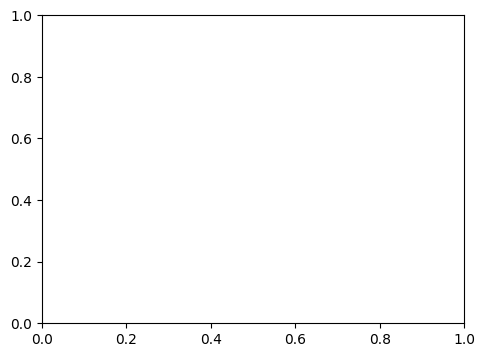

In [72]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()